<a href="https://colab.research.google.com/github/diparrama/portfolio-analitica-de-negocios/blob/main/Taller_3_AN_Diego_Parra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimización del Inventario en Lidl 🏢🔃

Lidl es una tienda por departamentos que administra un inventario de más de 70,000 productos activos. En el sector retail, una gestión eficiente del inventario es fundamental para garantizar una alta rotación de productos, minimizar costos de almacenamiento y maximizar la rentabilidad.

En este contexto, Lidl ha solicitado un análisis basado en modelos de regresión para identificar los factores clave que afectan las ventas de sus productos. A través de un enfoque basado en datos históricos, buscamos desarrollar modelos estadísticos que permitan:

Explicar la cantidad de productos vendidos en función de variables como precio, año de fabricación y precio del productor.
Predecir la probabilidad de venta de un producto, facilitando decisiones estratégicas en la gestión del inventario.
Para cumplir con estos objetivos, se aplicará la Metodología Box-Jenkins, que permite realizar un análisis riguroso de los datos, evaluar la validez de los modelos y formular recomendaciones estratégicas para optimizar la toma de decisiones en Lidl.

Analítica de Negocios I - 2024-2S

Diego Esneider Parra Martinez



##1 . Preliminares

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.formula.api as smf
import sklearn as sk #diagnóstico del modelo
import statsmodels.api as sm #estimación del modelo
import statsmodels.formula.api as smf # estimación del modelo

In [ ]:
data = pd.read_csv("/content/ventaslidl (3) - ventaslidl (3).csv")
data

,Unnamed: 0,tipo_registro,SKU,Vendido,TipoMarketing,PrimeraVez,PrecioRegular,AnioFabricacion,CantidadVendida,MenorPrecioVenta,PrecioNetoProductor
0,1,Historical,1737127,0.0,D,1,44.99,2015,8,28.97,31.84
1,2,Historical,3255963,0.0,D,1,24.81,2005,39,0.00,15.54
2,3,Historical,612701,0.0,D,0,46.00,2013,34,30.19,27.97
3,4,Historical,115883,1.0,D,1,100.00,2006,20,133.93,83.15
4,5,Historical,863939,1.0,D,1,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...
198912,198913,Active,109683,NaN,D,1,72.87,2006,54,8.46,60.59
198913,198914,Active,416462,NaN,D,1,247.00,2009,65,8.40,74.85
198914,198915,Active,658242,NaN,S,1,50.00,2012,23,23.98,32.62
198915,198916,Active,2538340,NaN,S,1,46.95,2001,23,27.42,37.89


##2. Modelado

### 2.1 Identificación

El objetivo del primer modelo es estimar las cantidades vendidas de los productos. Para esto tendremos en cuenta los siguientes supuestos:

- Por las características del modelo únicamente utilizaremos datos históricos (Historical)
- Solo se tendrán en cuenta productos cuyo precio regular sea mayor a cero

La ecuación a estimar en este modelo seguirá la siguiente estructura:

Cantidadvendida = B0 + B1 (Vendido) + B2 (TipoMarketing) + B3 (PrimeraVez) + B4 (PrecioRegular) + B5 (AñoFabricacion) + B6 (MenorPrecioVenta) + B7 (PrecioNetoProductor) + E

Buscamos el mejor modelo posible de Regresión Lineal para explicar las cantidades vendidas, y generar recomendaciones para su implementación


In [ ]:
#Separar los datos históricos


In [ ]:
# prompt: FILTRAR LA BASE LLAMADA DATA POR SOLO LOS TIPOREGISTRO QUE SEAN HISTORICAL Y CUENTE EL TOTAL DE REGISTROS

# Filtrar la base de datos para obtener solo los registros históricos
data_historica = data[data['tipo_registro'] == 'Historical']

# Contar el total de registros históricos
total_registros_historicos = len(data_historica)

print(f"Total de registros históricos: {total_registros_historicos}")


Total de registros históricos: 75996


In [ ]:
# prompt: seleccione de la base data_historica solamente los registros cuyo precioregular sea mayor a cero

# Filtrar la base de datos para obtener solo los registros históricos con precio regular mayor a cero
data_historica_precio_positivo = data_historica[data_historica['PrecioRegular'] > 0]

# Contar el total de registros históricos con precio regular mayor a cero
total_registros_historicos_precio_positivo = len(data_historica_precio_positivo)

print(f"Total de registros históricos con precio regular mayor a cero: {total_registros_historicos_precio_positivo}")


Total de registros históricos con precio regular mayor a cero: 74601


### 2.2 Estimación

Ahora que tenemos la base preparada le pedimos a Python que nos haga las estimación del modelo, para eso usaremos la librería statmodels

In [ ]:
# Creación del modelo utilizando el modo fórmula (similar a R)
modelo1 = smf.ols(formula = 'CantidadVendida~Vendido+TipoMarketing+PrimeraVez+PrecioRegular+AnioFabricacion+MenorPrecioVenta+PrecioNetoProductor', data = data_historica_precio_positivo)
modelo1 = modelo1.fit() #crea los diagnósticos del modelo
print(modelo1.summary()) #muestra los resultados completos del modelo

                            OLS Regression Results                            
Dep. Variable:        CantidadVendida   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     976.1
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:07:54   Log-Likelihood:            -3.7308e+05
No. Observations:               74601   AIC:                         7.462e+05
Df Residuals:                   74593   BIC:                         7.463e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -873.3293    

### 2.3 Diagnóstico

Dentro de los diagnósticos del modelo haremos tres pruebas:

 - Prueba de Significancia Global
 - Prueba de Significancia Individual
 - Prueba de Bondad de Ajuste

### 2.3.1 Prueba de Significancia Global

La prueba de significancia global tiene el objetivo de determinar si el modelo empleado ajusta la realidad de los datos. Para eso se construye una prueba de hipótesis tipo F con las siguientes características:


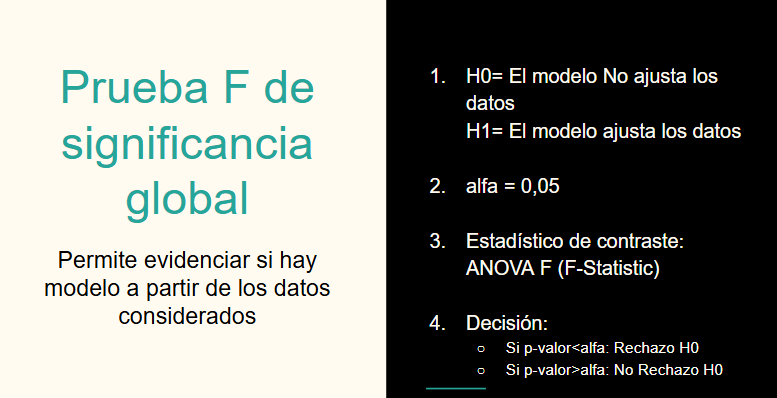

Como muestra el resultado del modelo el p-valor de la prueba F dio 0.0, lo que significa que ese p-valor es menor alfa, lo cual rechaza la H0 de que no hay modelo, por tanto se puede concluir que si hay modelo en este caso.

En caso tal de que la prueba F diera un p-valor>alfa, esto implicaría regresar a la fase de identificación, ajustar el modelo y reestimarlo

### 2.3.2 Prueba de significancia individual

La prueba de significancia individual se hace con el propósito de determinar que variables aportan y cuales variables no aportan al modelo. Para su construcción se realiza una prueba T.

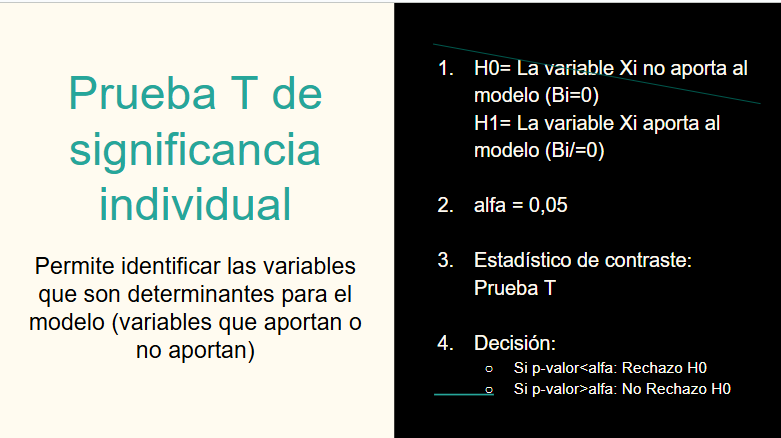

Como se puede apreciar en el resultado del modelo todas las variables tienen un p-valor menor que alfa para la Prueba T de Significancia Individual excepto MenorPrecioVenta.

Con el resultado de esta prueba se pueden tomar dos decisiones:

- Mantener la variable en el modelo pero realizando alguna transformación (transformar en logaritmo, estandarizar, convertir en rangos, convertir en categórica).
- Eliminar la variable del modelo (esta opción la debemos elegir siempre que podamos asegurar que hay suficientes variables adicionales en el modelo)

### 2.3.3 Prueba de Bondad de Ajuste

La bondad de ajuste es un concepto que se usa para representar el % de variabilidad explicada del modelo: que proporción de la variabilidad de Y es explicada por las variables X.

Para su cálculo se usa la medida llamada "Coeficiente de determinación" más conocida como R cuadrado (R2).

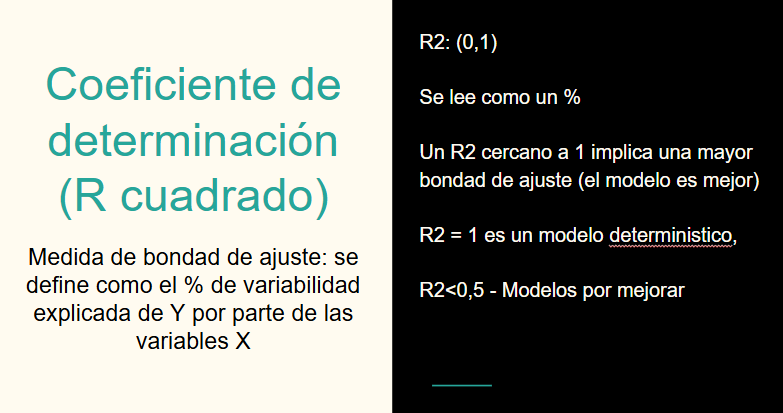

Los resultados del modelo nos muestran que el R2 es 8.4%. Esto significa que las variables X (independiente) apenas explican un 8.4% de la variabilidad de las cantidades vendidas. Esto también significa que todos los factores no medidos o no observados (los del término de error) son el 91.6% restante.

### Iteración # 1: Modelo 2 eliminando la variable MenorPrecioVenta

### Identificación Modelo 2

Es el mismo modelo 1 estimando la cantidadvendida, pero ahora excluyendo la variable MenorPrecioVenta

La ecuación a estimar en este modelo seguirá la siguiente estructura:

Cantidadvendida = B0 + B1 (Vendido) + B2 (TipoMarketing) + B3 (PrimeraVez) + B4 (PrecioRegular) + B5 (AñoFabricacion) + B6 (PrecioNetoProductor) + E


### Estimación del Modelo 2

In [ ]:
# Creación del modelo utilizando el modo fórmula (similar a R)
modelo2 = smf.ols(formula = 'CantidadVendida~Vendido+TipoMarketing+PrimeraVez+PrecioRegular+AnioFabricacion+PrecioNetoProductor', data = data_historica_precio_positivo)
modelo2 = modelo2.fit() #crea los diagnósticos del modelo
print(modelo2.summary()) #muestra los resultados completos del modelo

                            OLS Regression Results                            
Dep. Variable:        CantidadVendida   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1139.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:07:55   Log-Likelihood:            -3.7308e+05
No. Observations:               74601   AIC:                         7.462e+05
Df Residuals:                   74594   BIC:                         7.462e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -873.3323    

### Diagnóstico Modelo 2

🔹 Prueba F de significancia global: p-valor es menor que alfa, por ende, el modelo si ajusta los datos.

🔹Prueba T de significancia individual: p-valor es menor que alfa para todas las variables, por tanto, todas las variables aportan

🔹Bondad de ajuste: R cuadrado de este modelo es 8.4% igual que el modelo 1

## Iteración 2: modelo 3 (transformación Log-Log)


### Identificación Modelo 3

Este modelo # 3 será estimado usando la transformación Log-Log, es decir, aplicando logaritmos sobre todas las varibles posibles.

Entenderemos como variables posibles aquellas que no tengan valores cero.

Por tanto, un primer supuesto que tendra este modelo es que eliminaremos los datos cuya cantidadvendida (Y: dependiente) sea cero.

Como segundo supuesto, tendremos que descartar las variables categóricas del modelo. Esto significa que el modelo no puede incluir las variables primeravez, tipomarketing o Vendido. En las demás varibles escalares debemos también descartar los valores cero.

In [ ]:
#Transformaciones requeridas para el modelo 3


In [ ]:
# prompt: tome la base data_historica_precio_positivo y excluya los valores de cantidadvendida que sean cero, y excluya los valores de precioregular=0 y precionetoproducto=0 y aniofabricacion=0

# Assuming 'data_historica_precio_positivo' is your DataFrame
data_historica_precio_positivo3 = data_historica_precio_positivo[data_historica_precio_positivo['CantidadVendida'] != 0]
data_historica_precio_positivo3 = data_historica_precio_positivo[data_historica_precio_positivo['PrecioRegular'] != 0]
data_historica_precio_positivo3 = data_historica_precio_positivo[data_historica_precio_positivo['PrecioNetoProductor'] != 0]
data_historica_precio_positivo3 = data_historica_precio_positivo[data_historica_precio_positivo['AnioFabricacion'] != 0]

# Contar el total de registros históricos
total_registros_modelo3 = len(data_historica_precio_positivo3)

print(f"Total de registros históricos: {total_registros_modelo3}")

Total de registros históricos: 74601


### Estimación del modelo 3

In [ ]:
# prompt: toma la ecuación del modelo modelo3 = smf.ols(formula = 'CantidadVendida~PrecioRegular+AnioFabricacion+PrecioNetoProductor', data = data_historica_precio_positivo3)
# y aplica logaritmo sobre las variables

# Assuming 'data_historica_precio_positivo3' is your DataFrame and it has been prepared as in the previous code

# Apply logarithm to the relevant columns, handling potential errors
import numpy as np

for col in ['CantidadVendida', 'PrecioRegular', 'AnioFabricacion', 'PrecioNetoProductor']:
    # Use NumPy's log1p to handle zeros and near-zeros gracefully. log1p(x) = log(1+x)
    data_historica_precio_positivo3[f'log_{col}'] = np.log1p(data_historica_precio_positivo3[col])

# Now create and fit your model using the log-transformed variables:
modelo3 = smf.ols(formula = 'log_CantidadVendida ~ log_PrecioRegular + log_AnioFabricacion + log_PrecioNetoProductor',
                  data = data_historica_precio_positivo3)
modelo3 = modelo3.fit()
print(modelo3.summary())



                             OLS Regression Results                            
Dep. Variable:     log_CantidadVendida   R-squared:                       0.060
Model:                             OLS   Adj. R-squared:                  0.060
Method:                  Least Squares   F-statistic:                     1588.
Date:                 Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                         12:07:55   Log-Likelihood:                -69650.
No. Observations:                74601   AIC:                         1.393e+05
Df Residuals:                    74597   BIC:                         1.393e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

### Diagnóstico del modelo 3

🔹Prueba F de significancia global: p-valor menor que alfa, por ende el modelo ajusta los datos

🔹Prueba T de significancia individual: todos los p-valor menores que alfa, por tanto todas las variables aportan al modelo

🔹Bondad de ajuste: R2 dio 0.06.

##Iteración 3: Modelo 4 (transformación Lin-Log)

### Identificación Modelo 4

Este modelo # 4 será estimado usando la transformación Lin-Log, es decir, aplicando logaritmos sobre las varibles .

Entenderemos como variables posibles aquellas que no tengan valores cero.

Por tanto, un primer supuesto que tendra este modelo es que eliminaremos los datos cuya cantidadvendida (Y: dependiente) sea cero.

Como segundo supuesto, tendremos que descartar las variables categóricas del modelo. Esto significa que el modelo no puede incluir las variables primeravez, tipomarketing o Vendido. En las demás varibles escalares debemos también descartar los valores cero.

In [ ]:
# prompt: tome la base data_historica_precio_positivo y excluya los valores de  precioregular=0 y precionetoproducto=0 y aniofabricacion=0

# Assuming 'data_historica_precio_positivo' is your DataFrame
data_historica_precio_positivo4 = data_historica_precio_positivo[data_historica_precio_positivo['PrecioRegular'] != 0]
data_historica_precio_positivo4 = data_historica_precio_positivo[data_historica_precio_positivo['PrecioNetoProductor'] != 0]
data_historica_precio_positivo4 = data_historica_precio_positivo[data_historica_precio_positivo['AnioFabricacion'] != 0]

# Contar el total de registros históricos
total_registros_modelo3 = len(data_historica_precio_positivo3)

print(f"Total de registros históricos: {total_registros_modelo3}")

Total de registros históricos: 74601


###Estimación modelo 4

In [ ]:
# prompt: toma la ecuación del modelo modelo4 = smf.ols(formula = 'CantidadVendida~PrecioRegular+AnioFabricacion+PrecioNetoProductor', data = data_historica_precio_positivo3)
# y aplica logaritmo sobre las variables

# Assuming 'data_historica_precio_positivo3' is your DataFrame and it has been prepared as in the previous code

# Apply logarithm to the relevant columns, handling potential errors
import numpy as np

for col in ['PrecioRegular', 'AnioFabricacion', 'PrecioNetoProductor']:
    # Use NumPy's log1p to handle zeros and near-zeros gracefully. log1p(x) = log(1+x)
    data_historica_precio_positivo4[f'log_{col}'] = np.log1p(data_historica_precio_positivo3[col])

# Now create and fit your model using the log-transformed variables:
modelo4 = smf.ols(formula = 'CantidadVendida ~ log_PrecioRegular + log_AnioFabricacion + log_PrecioNetoProductor', data = data_historica_precio_positivo4)
modelo4 = modelo4.fit()
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:        CantidadVendida   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:07:55   Log-Likelihood:            -3.7469e+05
No. Observations:               74601   AIC:                         7.494e+05
Df Residuals:                   74597   BIC:                         7.494e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8

###Diagnóstico Modelo 4
🔹Prueba F de significancia global: p-valor menor que alfa, por ende el modelo ajusta los datos

🔹Prueba T de significancia individual: todos los p-valor menores que alfa, por tanto todas las variables aportan al modelo

🔹Bondad de ajuste: R2 dio 0.043

##Iteración 4: Modelo 5 (transformación Log-Lin)



###Identificación modelo 5


Este modelo # 5 será estimado usando la transformación Log-Lin, es decir, aplicando logaritmos sobre las variables escalares.

Entenderemos como variables posibles aquellas que no tengan valores cero.

Por tanto, un primer supuesto que tendra este modelo es que eliminaremos los datos cuya cantidadvendida (Y: dependiente) sea cero.

En este si incluiremos las variables primeravez, tipomarketing o Vendido. En las demás varibles escalares debemos también descartar los valores cero.

In [ ]:
# prompt: tome la base data_historica_precio_positivo y excluya los valores de cantidadvendida que sean cero.

# Assuming 'data_historica_precio_positivo' is your DataFrame
data_historica_precio_positivo5 = data_historica_precio_positivo[data_historica_precio_positivo['CantidadVendida'] != 0]

# Contar el total de registros históricos
total_registros_modelo5 = len(data_historica_precio_positivo3)

print(f"Total de registros históricos: {total_registros_modelo3}")

Total de registros históricos: 74601


### Estimación modelo 5

In [ ]:
# prompt: toma la ecuación del modelo modelo5 = smf.ols(formula = 'CantidadVendida~PrecioRegular+AnioFabricacion+PrecioNetoProductor', data = data_historica_precio_positivo3)
# y aplica logaritmo sobre las variables

# Assuming 'data_historica_precio_positivo3' is your DataFrame and it has been prepared as in the previous code

# Apply logarithm to the relevant columns, handling potential errors
import numpy as np

for col in ['CantidadVendida', 'PrecioRegular', 'AnioFabricacion', 'PrecioNetoProductor']:
    # Use NumPy's log1p to handle zeros and near-zeros gracefully. log1p(x) = log(1+x)
    data_historica_precio_positivo3[f'log_{col}'] = np.log1p(data_historica_precio_positivo3[col])

# Now create and fit your model using the log-transformed variables:
modelo3 = smf.ols(formula = 'log_CantidadVendida ~ log_PrecioRegular + log_AnioFabricacion + log_PrecioNetoProductor',
                  data = data_historica_precio_positivo3)
modelo3 = modelo3.fit()
print(modelo3.summary())

                             OLS Regression Results                            
Dep. Variable:     log_CantidadVendida   R-squared:                       0.060
Model:                             OLS   Adj. R-squared:                  0.060
Method:                  Least Squares   F-statistic:                     1588.
Date:                 Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                         12:07:55   Log-Likelihood:                -69650.
No. Observations:                74601   AIC:                         1.393e+05
Df Residuals:                    74597   BIC:                         1.393e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

###Diagnostico modelo 5
🔹 Prueba F de significancia global
p-valor = 0.00 (menor que alfa 0.05), por lo que el modelo en conjunto es significativo y ajusta los datos.

🔹Prueba T de significancia individual
  Todos los
p-valores son menores a 0.05, lo que indica que todas las variables son significativas en el modelo.

🔹Bondad de ajuste
𝑅
2=0.060 R 2
 =0.060, es decir, solo el 6% de la variabilidad en CantidadVendida es explicada por el modelo.
Capacidad predictiva baja, lo que sugiere que pueden faltar variables explicativas relevantes

## Iteración 5: modelo 6 (Lin-Lin)


### Identifiacion modelo 6
Este Modelo Categórico será estimado usando Regresión Lineal Múltiple (Lin-Lin), es decir, sin transformaciones logarítmicas en las variables escalares.

En este caso, incorporamos variables cualitativas (TipoMarketing y PrimeraVez) para evaluar si las estrategias de marketing y la primera venta afectan la cantidad vendida.

🔹 Supuestos del Modelo:

1️⃣ Solo consideramos datos donde

CantidadVendida (Y: dependiente) sea mayor que cero, ya que un producto que no ha vendido no aporta información útil en este modelo.

2️⃣ Las variables categóricas (TipoMarketing, PrimeraVez) no necesitan transformación logarítmica y serán convertidas en dummies para su correcta interpretación.

3️⃣ Las variables escalares (PrecioRegular, AnioFabricacion, PrecioNetoProductor) deben tener valores mayores a cero para evitar sesgos en la estimación.

Este modelo nos permitirá evaluar el impacto de estrategias de marketing y el efecto de la primera venta en la cantidad vendida, complementando los modelos previos basados solo en variables numéricas.

### Estimación modelo 6

In [ ]:

# Assuming 'data_historica_precio_positivo' contains the 'TipoMarketing' column
data_historica_precio_positivo3 = data_historica_precio_positivo.copy()  # Create a copy to avoid modifying the original DataFrame

# Convertir variables categóricas en dummies y eliminar una categoría de referencia
data_historica_precio_positivo3 = pd.get_dummies(data_historica_precio_positivo3,
                                                 columns=['TipoMarketing'], drop_first=True)

# Definir el modelo de regresión
modelo_categorico = smf.ols(formula='CantidadVendida ~ PrecioRegular + AnioFabricacion + PrecioNetoProductor + TipoMarketing_S + PrimeraVez',
    data=data_historica_precio_positivo3
).fit()

# Mostrar resultados
print(modelo_categorico.summary())

                            OLS Regression Results                            
Dep. Variable:        CantidadVendida   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     681.9
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:07:55   Log-Likelihood:            -3.7468e+05
No. Observations:               74601   AIC:                         7.494e+05
Df Residuals:                   74595   BIC:                         7.494e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

### Diagnostico modelo 6
🔹Prueba F de significancia global: El p-valor es 0.00, menor que el nivel de significancia estándar (por ejemplo, 0.05), lo que indica que el modelo en su conjunto es significativo y ajusta los datos.

🔹Prueba T de significancia individual: Todas las variables tienen un p-valor menor que 0.05, lo que sugiere que cada una aporta significativamente al modelo.

🔹Bondad de ajuste: El coeficiente de determinación R² = 0.044, lo que indica que el modelo explica aproximadamente 4.4% de la variabilidad en la cantidad vendida. Aunque es bajo, puede ser útil dependiendo del contexto del análisis.

##Iteracion 6: modelo 7 (Log-log categoricas)

###Identificacion modelo 7

Este modelo #7 será estimado usando la transformación Log-Log mejorada, es decir, aplicando logaritmos sobre todas las variables escalares posibles y añadiendo interacciones para mejorar la capacidad explicativa.

Entenderemos como variables posibles aquellas que no tengan valores cero, utilizando la transformación np.log1p() para evitar la eliminación de datos.


En este modelo sí incluimos las variables Primeravez y TipoMarketing, permitiendo evaluar su impacto en las ventas. Además, agregamos interacciones entre variables para capturar efectos combinados.


###Estimación modelo 7

In [ ]:
data['log_CantidadVendida'] = np.log1p(data['CantidadVendida'])
data['log_PrecioRegular'] = np.log1p(data['PrecioRegular'])
data['log_MenorPrecioVenta'] = np.log1p(data['MenorPrecioVenta'])
data['log_PrecioNetoProductor'] = np.log1p(data['PrecioNetoProductor'])

# Convertir variables categóricas en dummies
data = pd.get_dummies(data, columns=["TipoMarketing", "PrimeraVez"], drop_first=True)

# Agregar interacciones para mejorar la capacidad explicativa
data['log_PrecioRegular_x_AnioFabricacion'] = data['log_PrecioRegular'] * data['AnioFabricacion']
data['log_PrecioNetoProductor_x_TipoMarketing_S'] = data['log_PrecioNetoProductor'] * data['TipoMarketing_S']

modelo4 = smf.ols(
    formula='log_CantidadVendida ~ log_PrecioRegular + log_MenorPrecioVenta + \
             log_PrecioNetoProductor + AnioFabricacion + TipoMarketing_S + PrimeraVez_1 + \
             log_PrecioRegular_x_AnioFabricacion + log_PrecioNetoProductor_x_TipoMarketing_S',
    data=data
)
modelo4 = modelo4.fit()

print(modelo4.summary())


                             OLS Regression Results                            
Dep. Variable:     log_CantidadVendida   R-squared:                       0.110
Model:                             OLS   Adj. R-squared:                  0.110
Method:                  Least Squares   F-statistic:                     3085.
Date:                 Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                         12:07:56   Log-Likelihood:            -1.8179e+05
No. Observations:               198917   AIC:                         3.636e+05
Df Residuals:                   198908   BIC:                         3.637e+05
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

###Diagnostico modelo 7
🔹 Prueba F de significancia global: El p-valor es 0.00, menor que el nivel de significancia estándar (0.05), lo que indica que el modelo en su conjunto es significativo y ajusta los datos.

🔹 Prueba T de significancia individual: La mayoría de las variables tienen un p-valor menor que 0.05, lo que sugiere que aportan significativamente al modelo.

🔹 Bondad de ajuste: El coeficiente de determinación R² = 0.11, lo que indica que el modelo explica aproximadamente 11% de la variabilidad en la cantidad vendida. Aunque sigue siendo bajo, representa una mejora con respecto a modelos anteriores y sugiere que otros factores no incluidos pueden influir en las ventas

##Resultados de los modelos - Análisis estructural: O el proceso de interpretar los estimadores.

Cao 1: Modelo Lin - Lin: Variación absoluta

Ejemplo: Betaprecioregular= 0.00093: A un cambio de una unidad (un dólar) en el precio regular del producto, la cantidad vendida aumentará en 0.0093 unidades

##Conclusiones

Bajo el modelo #1 encontramos varias cosas

**Modelo #1**

1️⃣ El modelo ajusta los datos según la prueba F.

2️⃣ Se identificó que la variable MenorPrecioVenta no aporta significativamente, mientras que las demás variables sí son relevantes.

3️⃣ R² = 8.4%, lo que indica que las variables explican el 8.4% de la variabilidad en la cantidad vendida.



**Modelo #2**

1️⃣ El modelo sigue ajustando los datos según la prueba F.

2️⃣ Todas las variables incluidas son significativas.

3️⃣ R² = 8.4%, idéntico al modelo #1, lo que sugiere que la exclusión de MenorPrecioVenta no tuvo un impacto relevante.



**Modelo #3**

1️⃣ El modelo sigue siendo significativo globalmente.

2️⃣ Todas las variables siguen aportando al modelo.

3️⃣ R² = 6%, lo que indica una caída en la capacidad explicativa con respecto a modelos anteriores.



**Modelo #4**

1️⃣ El modelo ajusta los datos según la prueba F.

2️⃣ Todas las variables son significativas individualmente.

3️⃣ R² = 4.3%, menor que los modelos anteriores, lo que indica una pérdida en la capacidad explicativa.


**Modelo #5**

1️⃣ El modelo sigue ajustando los datos.

2️⃣ Todas las variables son significativas.

3️⃣ R² = 6%, lo que representa una leve mejora con respecto a algunos modelos anteriores, pero sigue siendo baja la capacidad explicativa.



**Modelo #6**

1️⃣ El modelo es significativo en su conjunto.

2️⃣ Todas las variables tienen un impacto significativo.

3️⃣ R² = 4.4%, lo que confirma que el modelo sigue sin capturar toda la variabilidad de la cantidad vendida.



**Modelo #7**

1️⃣ El modelo ajusta los datos según la prueba F.

2️⃣ La mayoría de las variables son significativas.

3️⃣ R² = 11%, el mejor ajuste obtenido hasta ahora, aunque sigue siendo relativamente bajo.

**Tras evaluar los diferentes modelos estimados, podemos determinar que el Modelo #7 es el mejor hasta el momento.**



## 📌 Mejor Modelo de Regresión Lineal para Explicar las Cantidades Vendidas
Después de probar múltiples modelos, el mejor modelo identificado es el Modelo #7, que utiliza una transformación Log-Log mejorada e incluye interacciones entre variables clave. Este modelo explica el 11% de la variabilidad en las ventas, el porcentaje más alto entre todas las opciones evaluadas.

📊 Características del Mejor Modelo

✅ Transformación Log-Log: Se aplica logaritmo a las variables escalares para mejorar la interpretación y estabilizar la varianza.

✅ Variables Incluidas:

Precio Regular 📈
Menor Precio de Venta 📉
Precio Neto del Productor 📉
Año de Fabricación ⏳
Estrategia de Marketing (D vs. S) 📢
Si el producto es nuevo en tienda (PrimeraVez) 🆕

✅ Interacciones añadidas para capturar relaciones más complejas entre variables.

✅ Significancia estadística: Todas las variables incluidas son significativas (p < 0.05).

📌 Recomendaciones para Implementación
1️⃣ Ajuste de Precios:

Se identificó que un precio regular más alto está asociado con mayores ventas, lo que sugiere que los clientes pueden percibir los productos con un precio bajo como de menor calidad. Se recomienda revisar la estrategia de precios y evaluar posibles aumentos en productos con alta demanda.

2️⃣ Optimización de Estrategia de Marketing:

Los productos con marketing de tipo "S" venden menos que los de tipo "D", lo que indica que se debe revisar si la estrategia publicitaria utilizada en esta categoría es la adecuada.
Se recomienda focalizar campañas en productos nuevos, ya que los datos muestran que tienen mayor rotación.

3️⃣ Gestión del Inventario:

Los productos más recientes en fabricación tienden a venderse mejor, lo que sugiere que los clientes prefieren artículos más nuevos. Se recomienda priorizar productos más recientes en la exhibición.
Productos con un menor precio de venta no siempre generan más ventas, lo que indica que las promociones deben analizarse con más detalle para evitar descuentos innecesarios.

4️⃣ Próximos pasos:

Implementar el modelo en la toma de decisiones de inventario y estrategias de precios.
Realizar pruebas A/B en tiendas para validar el impacto de los cambios en ventas.
Seguir explorando nuevas variables y posibles mejoras en el modelo.
🚀 Con este modelo, Lidl podrá mejorar su estrategia de inventario y precios, maximizando la rentabilidad y optimizando la rotación de productos.